In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np
from numpy.polynomial.polynomial import Polynomial
from scipy.interpolate import lagrange
x_i = np.array([0, 1, -1, 2])
y_i = np.array([5, 2.5, 2.5, 1])

poly = lagrange(x_i, y_i)

Polynomial(poly).coef[::-1] #gibt das Polynom der Potenz x aufsteigend zurück

array([-5.,  4., -7.,  2.,  3.])

In [2]:
l = np.arange(0, x_i.size) 
l

array([0, 1, 2, 3, 4])

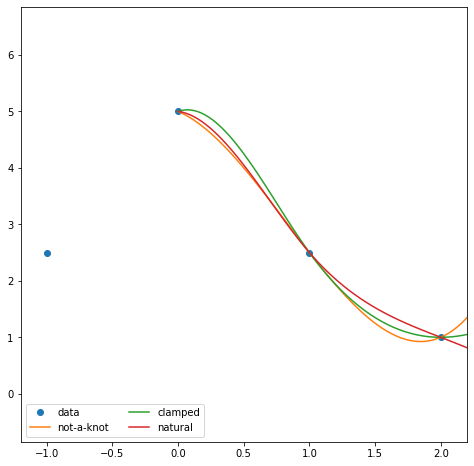

In [17]:
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
x = np.array([-1, 0, 1, 2])
y = np.array([2.5, 5, 2.5, 1])
ks = CubicSpline(x, y, bc_type='not-a-knot')
#ps = CubicSpline(x, y, bc_type='periodic')
cs = CubicSpline(x, y, bc_type='clamped')
ns = CubicSpline(x, y, bc_type='natural')
xs = np.linspace(0, 3, 101)
plt.figure(figsize=(8, 8))
plt.plot(x, y, 'o', label='data')
#plt.plot(xs, , label='true')
plt.plot(xs, ks(xs), label="not-a-knot")
#plt.plot(xs, ps(xs), label="periodic")
plt.plot(xs, cs(xs), label="clamped")
plt.plot(xs, ns(xs), label="natural")
plt.xlim(-1.2, 2.2)
plt.legend(loc='lower left', ncol=2)
plt.show()

In [15]:
x = np.arange(10)
y = np.sin(x)
cs = CubicSpline(x, y)
xs = np.linspace(0, 3.1, 101)
xs


array([0.   , 0.031, 0.062, 0.093, 0.124, 0.155, 0.186, 0.217, 0.248,
       0.279, 0.31 , 0.341, 0.372, 0.403, 0.434, 0.465, 0.496, 0.527,
       0.558, 0.589, 0.62 , 0.651, 0.682, 0.713, 0.744, 0.775, 0.806,
       0.837, 0.868, 0.899, 0.93 , 0.961, 0.992, 1.023, 1.054, 1.085,
       1.116, 1.147, 1.178, 1.209, 1.24 , 1.271, 1.302, 1.333, 1.364,
       1.395, 1.426, 1.457, 1.488, 1.519, 1.55 , 1.581, 1.612, 1.643,
       1.674, 1.705, 1.736, 1.767, 1.798, 1.829, 1.86 , 1.891, 1.922,
       1.953, 1.984, 2.015, 2.046, 2.077, 2.108, 2.139, 2.17 , 2.201,
       2.232, 2.263, 2.294, 2.325, 2.356, 2.387, 2.418, 2.449, 2.48 ,
       2.511, 2.542, 2.573, 2.604, 2.635, 2.666, 2.697, 2.728, 2.759,
       2.79 , 2.821, 2.852, 2.883, 2.914, 2.945, 2.976, 3.007, 3.038,
       3.069, 3.1  ])

In [295]:
x_i = np.array([0, 1, -1, 2, -2])
y_i = np.array([-5, -3, -15, 39, -9])


def lagrange_interpolation(x_i, y_i, X): #hier Funktionsbefehl einfügen
    
    x_i.shape #Wiedergabe der Länge des arrays in jeder Dimension. / 
    y_i.shape #Returns the length of the array in each dimension.

    if (x_i.shape != y_i.shape) or (x_i.ndim != y_i.ndim) or (x_i.size == 1) or (y_i.size == 1):

        print('Dimension und Länge der arrays in jeder Dimension müssen gleich sein. / Dimension and length of both arrays have to be identical')
        
        
    mask_sort = np.argsort(x_i) #gibt die Indexe des arrays in einer aufsteigend geordneten Reihenfolge zurück / returns ascending ordered indices of the array
    y_i_sort = y_i[mask_sort] #mithilfe dieser Maske werden die Werte von y den Indexen von x entsprechend geordnet / y values ordered according to indices of x
    x_i_sort = np.sort(x_i) #x Werte werden aufsteigend geordnet

    print('mask_sort:',mask_sort, 'x_i_sort:', x_i_sort, 'y_i_sort:', y_i_sort)

    if (X < x_i_sort[0]) or (X > x_i_sort[-1]):
        #Gewähltes 'X' muss innerhalb des x-arrays liegen. [-1] gibt das letzte Element eines arrays an.
        #Chosen 'X' has to be in the range of our x-array. [-1] returns the last element of an array.
        
        print('X muss innerhalb des x-arrays liegen. / X must be a value within the range of x.')
        

    
    l = range(0, x_i.size) 
    L = np.ones(x_i.size)
    L_i = L.tolist()
    
    for i in l:
        
        L_i[i]
        
        for j in l: 
            
            if i == j: continue 
            
            else:
                
                L_i[i]= L_i[i]*(X-x_i[j])/(x_i[i]-x_i[j])
    
    Y = 0

    for i in l:
        
        Y = Y + y_i[i] * L_i[i]
        
    return Y


print('Y an der Stelle X / Y in X =', lagrange_interpolation(x_i, y_i, 0.5))


mask_sort: [4 2 0 1 3] x_i_sort: [-2 -1  0  1  2] y_i_sort: [ -9 -15  -5  -3  39]
Y an der Stelle X / Y in X = -4.3125


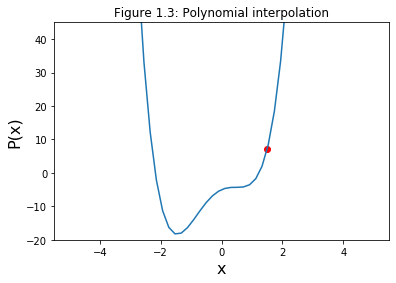

In [25]:
X = 1.5
Y = lagrange_interpolation(x_i, y_i, X)
x = np.linspace(-5, 5)
P = (-5+4*x-7*x**2+2*x**3+3*x**4)
plt.title('Figure 1.3: Polynomial interpolation', loc='center')
plt.plot(x, P)
plt.scatter(X, Y, color='red')
plt.xlabel('x', fontsize=16)
plt.ylabel('P(x)', fontsize=16)
plt.ylim(-20, 45);


<div class="display: flex; align-items: center; justify-content: flex-start;">
    <table style="font-size: 14px; margin: 12px 0 0 0; font-family: serif;">
        <tr style="background: transparent;">
            <th style="text-align: left; border-right: 1px solid #000000; border-bottom: 1px solid #000000;">$i$</th>
            <th style="text-align: left; border-right: 1px solid #000000; border-bottom: 1px solid #000000;">$x_i$</th>
            <th style="text-align: center; border-right: 1px solid #000000; border-bottom: 1px solid #000000; width: 72px;">$y_i$</th>
             <th style="border-right: 1px solid #000000; border-bottom: 1px solid #000000; width: 4px; padding: 0;"></th>
            <th style="text-align: center; border-right: 1px solid #000000; border-bottom: 1px solid #000000; width: 150px">$[x_{1} x_0]$</th>
            <th style="text-align: center; border-right: 1px solid #000000; border-bottom: 1px solid #000000; width: 110px;">$[x_{2} x_{1} x_0]$</th>
            <th style="text-align: center; border-right: 1px solid #000000; border-bottom: 1px solid #000000; width: 120px">$[x_{3} x_{2} x_{1} x_0]$</th>
            <th style="text-align: left; border-right: 1px solid #000000; border-bottom: 1px solid #000000;">$[x_4 x_{3} x_{2} x_{1} x_0]$</th>
        </tr>
        <tr style="background: transparent; width: 24px;">
            <td style="text-align: left; border-right: 1px solid #000000;">0</td>
            <td style="text-align: center; border-right: 1px solid #000000; ">0</td>
            <td style="text-align: left; border-right: 1px solid #000000; ">$-5 = a_0$</td>
            <td style="text-align: left; border-right: 1px solid #000000; width: 4px; padding: 0;"></td>
            <td style="text-align: left; border-right: 1px solid #000000; "></td>
            <td style="text-align: left; border-right: 1px solid #000000; "></td>
            <td style="text-align: left; border-right: 1px solid #000000;"></td>
            <td style="text-align: left; border-right: 1px solid #000000;"></td>
        </tr>
        <tr style="background: transparent;">
            <td style="text-align: left; border-right: 1px solid #000000;"></td>
            <td style="text-align: center; border-right: 1px solid #000000; "></td>
            <td style="text-align: center; border-right: 1px solid #000000; "></td>
            <td style="text-align: left; border-right: 1px solid #000000;width: 4px; padding: 0; "></td>
            <td style="font-size: 13px; text-align: left; border-right: 1px solid #000000; ">$$\frac{-3-(-5)}{1-0}=2=a_1$$</td>
            <td style="text-align: left; border-right: 1px solid #000000; "></td>
            <td style="text-align: left; border-right: 1px solid #000000;"></td>
            <td style="text-align: left; border-right: 1px solid #000000;"></td>
        </tr>
        <tr style="background: transparent;">
            <td style="text-align: center; border-right: 1px solid #000000;">1</td>
            <td style="text-align: center; border-right: 1px solid #000000; width: 4px; padding: 0;">1</td>
            <td style="text-align: center; border-right: 1px solid #000000;">-3</td>
            <td style="text-align: left; border-right: 1px solid #000000; width: 4px; padding: 0;"></td>
            <td style="text-align: left; border-right: 1px solid #000000;"></td>
            <td style="text-align: left; border-right: 1px solid #000000;">$$-4 = a_2$$</td>
            <td style="text-align: left; border-right: 1px solid #000000;"></td>
            <td style="text-align: left; border-right: 1px solid #000000;"></td>
        </tr>
        <tr style="background: transparent;">
            <td style="text-align: left; border-right: 1px solid #000000;"></td>
            <td style="text-align: center; border-right: 1px solid #000000; "></td>
            <td style="text-align: center; border-right: 1px solid #000000; "></td>
            <td style="text-align: left; border-right: 1px solid #000000;width: 4px; padding: 0; "></td>
            <td style="font-size: 12px; text-align: left; border-right: 1px solid #000000; ">$$\frac{-15-(-3)}{-1-1}=6$$</td>
            <td style="text-align: left; border-right: 1px solid #000000; "></td>
            <td style="text-align: center; border-right: 1px solid #000000;">$8 = a_3$</td>
            <td style="text-align: left; border-right: 1px solid #000000;"></td>
        </tr>
       <tr style="background: transparent;">
            <td style="text-align: left; border-right: 1px solid #000000;">2</td>
            <td style="text-align: center; border-right: 1px solid #000000; width: 4px; padding: 0;">-1</td>
            <td style="text-align: center; border-right: 1px solid #000000;">-15</td>
            <td style="text-align: left; border-right: 1px solid #000000;width: 4px; padding: 0;"></td>
            <td style="text-align: left; border-right: 1px solid #000000;"></td>
            <td style="text-align: center; border-right: 1px solid #000000;">12</td>
            <td style="text-align: left; border-right: 1px solid #000000;"></td>
           <td style="text-align: left; border-right: 1px solid #000000;">$$\frac{25}{4} = a_4$$</td>
        </tr>
        <tr style="background: transparent;">
            <td style="text-align: left; border-right: 1px solid #000000;"></td>
            <td style="text-align: center; border-right: 1px solid #000000; "></td>
            <td style="text-align: center; border-right: 1px solid #000000; "></td>
            <td style="text-align: left; border-right: 1px solid #000000;width: 4px; padding: 0; "></td>
            <td style="font-size: 12px; text-align: left; border-right: 1px solid #000000; ">$$\frac{39-(-15)}{2-(-1)}=18$$</td>
            <td style="text-align: left; border-right: 1px solid #000000; "></td>
            <td style="text-align: left; border-right: 1px solid #000000;">$$-\frac{9}{2}$$</td>
            <td style="text-align: left; border-right: 1px solid #000000;"></td>
        </tr>
        <tr style="background: transparent; width: 24px;">
            <td style="text-align: left; border-right: 1px solid #000000;">3</td>
            <td style="text-align: center; border-right: 1px solid #000000; ">2</td>
            <td style="text-align: center; border-right: 1px solid #000000; ">39</td>
            <td style="text-align: left; border-right: 1px solid #000000;width: 4px; padding: 0; "></td>
            <td style="text-align: left; border-right: 1px solid #000000; "></td>
            <td style="text-align: left; border-right: 1px solid #000000; ">$$\frac{51}{2}$$</td>
            <td style="text-align: left; border-right: 1px solid #000000;"></td>
            <td style="text-align: left; border-right: 1px solid #000000;"></td>
        </tr>
        <tr style="background: transparent;">
            <td style="text-align: left; border-right: 1px solid #000000;"></td>
            <td style="text-align: center; border-right: 1px solid #000000; "></td>
            <td style="text-align: center; border-right: 1px solid #000000; "></td>
            <td style="text-align: left; border-right: 1px solid #000000;width: 4px; padding: 0; "></td>
            <td style="font-size: 12px; text-align: left; border-right: 1px solid #000000; ">$$\frac{-9-(-39)}{-2-2}=-\frac{15}{2}$$</td>
            <td style="text-align: left; border-right: 1px solid #000000; "></td>
            <td style="text-align: left; border-right: 1px solid #000000;"></td>
            <td style="text-align: left; border-right: 1px solid #000000;"></td>
        </tr>
        <tr style="background: transparent; width: 24px;">
            <td style="text-align: left; border-right: 1px solid #000000;">4</td>
            <td style="text-align: center; border-right: 1px solid #000000; ">-2</td>
            <td style="text-align: center; border-right: 1px solid #000000; ">-9</td>
            <td style="text-align: left; border-right: 1px solid #000000;width: 4px; padding: 0; "></td>
            <td style="text-align: left; border-right: 1px solid #000000; "></td>
            <td style="text-align: left; border-right: 1px solid #000000; "></td>
            <td style="text-align: left; border-right: 1px solid #000000;"></td>
            <td style="text-align: left; border-right: 1px solid #000000;"></td>
        </tr>
    </table>
</div>
 


In [258]:
# x = np.array([0, 1, -1, 2, -2])
# y = np.array([-5, -3, -15, 39, -9])

# def divided(x, y):

# #     0 1 = 1 0 - 0 0 / x1 - x0   
# #     1 1 = 2 0 - 1 0 / x2 - x1  
# #     2 1 = 3 0 - 2 0 / x3 - x2  
# #     3 1 = 4 0 - 3 0 / x4 - x3

# #     0 2 = 1 1 - 0 1 / x2 - x0  
# #     1 2 = 2 1 - 1 1 / x3 - x1  
# #     2 2 = 3 1 - 2 1 / x4 - x2

# #     0 3 = 1 2 - 0 2 / x3 - x0 
# #     1 3 = 2 2 - 1 2 / x4 - x1

# #     0 4 = 1 3 - 0 3 / x4 - x0


#     size = y.size

#     p = np.zeros([size, size])
    
#     p[::, 0] = y

#     for i in range(1, size):
#         for j in range(size - i):
            
#             p[j][i] = (p[j + 1][i - 1] - p[j][i - 1]) / (x[j + i] - x[j])
            
# #             print(j, i, '=', j + 1, i - 1, '-', j, i - 1, '/', 'x' + str(j + i), '-', 'x' + str(j))
            
# #         print()
        
#     return p
             
# result = divided(x, y)

# print(result[0])
# print(result)


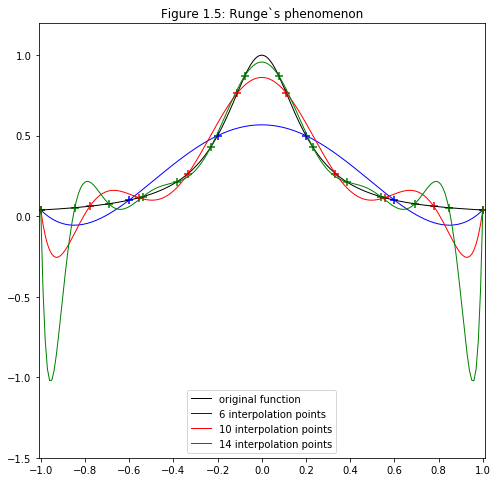

In [2]:
x_org = np.linspace(-1, 1, 201)
x_6 = np.linspace(-1, 1, 6)
x_10 = np.linspace(-1, 1, 10)
x_14 = np.linspace(-1, 1, 14)

#nur mit der 25 als Koeffizient entsteht das gewünschte Bild

y_org = (1/(1+25*x_org**2))
y_6 = (1/(1+25*x_6**2))
y_10 = (1/(1+25*x_10**2))
y_14 = (1/(1+25*x_14**2))


plt.figure(figsize=(8,8))
plt.title('Figure 1.5: Runge`s phenomenon', loc='center')
plt.plot(x_org, y_org, color = 'black', linewidth = 1, label = r'original function');
plt.xticks(np.arange(-1,1.2,0.2))
poly = lagrange(x_6, y_6)
y_interp = poly(x_org)
plt.plot(x_org, y_interp, color = 'blue', lw = 1, label = r'6 interpolation points')

poly = lagrange(x_10, y_10)
y_interp = poly(x_org)
plt.plot(x_org, y_interp, color = 'red', lw = 1, label = r'10 interpolation points')

poly = lagrange(x_14, y_14)
y_interp = poly(x_org)
plt.plot(x_org, y_interp, color = 'green', lw = 1, label = r'14 interpolation points')

plt.scatter(x_6, y_6, color='blue', marker = '+', s = 8**2)
plt.scatter(x_10, y_10, color='red', marker = '+', s = 8**2)
plt.scatter(x_14, y_14, color='green', marker = '+', s = 8**2)

plt.xlim(-1.01, 1.01);
plt.ylim(-1.5, 1.2);

plt.legend(loc='lower center');

In [91]:
np.arange(-1, 1, 0.2)

array([-1.00000000e+00, -8.00000000e-01, -6.00000000e-01, -4.00000000e-01,
       -2.00000000e-01, -2.22044605e-16,  2.00000000e-01,  4.00000000e-01,
        6.00000000e-01,  8.00000000e-01])

In [86]:
plt.xscale??

In [252]:
n = np.shape(x_i)[0] #erste Reihe
#p = np.zeros([n, n])
#p[::,0] = y_i
#y_i
#p #erste Klammer Zeile, zweite Klammer Spalte

In [59]:
x_i = np.array([0, 1, -1, 2, -2])
y_i = np.array([-5, -3, -15, 39, -9])

def dividedDifferences(x_i, y_i): 

    x_i.shape #Wiedergabe der Länge des arrays in jeder Dimension. / 
    y_i.shape #Returns the length of the array in each dimension.

    if (x_i.shape != y_i.shape) or (x_i.ndim != y_i.ndim) or (x_i.size == 1) or (y_i.size == 1):

        print('Dimension und Länge der arrays in jeder Dimension müssen gleich sein. / Dimension and length of both arrays have to be identical')
        
    n = y_i.size #oder/or n = x_i.size / n entspricht der Länge des arrays / n comply with the length of the array
     
    pyramid = np.zeros([n, n]) #Erstellung einer 5x5 Matrix, gefüllt mit Nullen / production af a 5x5 matrix full of zeros
    
    pyramid[::, 0] = y_i #in die erste Spalte wird y_i eingetragen / first column of our new matrix is y_i
    
    #Die pyramid Matrix wird nun mit Werten gefüllt (entsprechend der Tabelle in 1.3.11) / The pyramid matrix is filled with values (corresponding to the table in 1.3.11)
    
    for i in range(1,n):
        
        for j in range(n-i):
            
            pyramid[j][i] = (pyramid[j+1][i-1] - pyramid[j][i-1]) / (x_i[j+i] - x_i[j])
    
    #print(pyramid) 
    
    return pyramid #In der ersten Zeile der pyramid Matrix befinden sich die gesuchten Koeffizienten. / In the first row of the pyramid matrix you will find your Newton coefficients.

coeff = dividedDifferences(x_i, y_i)

print(coeff[0])


[-5.  2. -4.  8.  3.]


In [316]:
x_i = np.array([0, 1, -1, 2, -2])
y_i = np.array([-5, -3, -15, 39, -9])
a = np.array([1,2,3,4,5])


x_i.shape #Wiedergabe der Länge des arrays in jeder Dimension. / 
y_i.shape #Returns the length of the array in each dimension.

b=x_i*a
sum(b)

-3

In [170]:
l = np.arange(0, x_i.size) 
n = l[-1]    
l[1:]

4

In [171]:
np.shape(y_i)[0]

5

In [174]:
# pyramid[::, 0] = y_i
# y_i
# p

array([[ -5.,   0.,   0.,   0.,   0.],
       [ -3.,   0.,   0.,   0.,   0.],
       [-15.,   0.,   0.,   0.,   0.],
       [ 39.,   0.,   0.,   0.,   0.],
       [ -9.,   0.,   0.,   0.,   0.]])

In [266]:
z = np.array([[0, 1, -1, 2, -2],[-5, -3, -15, 39, -9]])
z.shape[1]

5

In [217]:
range?

In [288]:
x_i = np.array([0, 1, -1, 2, -2])
y_i = np.array([-5, -3, -15, 39, -9])
n = np.arange(x_i.size-1) 
n

array([0, 1, 2, 3])

In [63]:
#Newton interpolation

x_i = np.array([0, 1, -1, 2, -2])
y_i = np.array([-5, -3, -15, 39, -9])


def newton_interpolation(x_i, y_i, X): 

    x_i.shape #Wiedergabe der Länge des arrays in jeder Dimension. / 
    y_i.shape #Returns the length of the array in each dimension.

    if (x_i.shape != y_i.shape) or (x_i.ndim != y_i.ndim) or (x_i.size == 1) or (y_i.size == 1):

        print('Dimension und Länge (größer als eins) der arrays in jeder Dimension müssen gleich sein. / Dimension and length (bigger than one) of both arrays have to be identical')
        
        
    mask_sort = np.argsort(x_i) #gibt die Indexe des arrays in einer aufsteigend geordneten Reihenfolge zurück / returns ascending ordered indices of the array
    y_i_sort = y_i[mask_sort] #mithilfe dieser Maske werden die Werte von y den Indexen von x entsprechend geordnet / y values ordered according to indices of x
    x_i_sort = np.sort(x_i) #x Werte werden aufsteigend geordnet

    #print('mask_sort:',mask_sort, 'x_i_sort:', x_i_sort, 'y_i_sort:', y_i_sort)

    if (X < x_i_sort[0]) or (X > x_i_sort[-1]):
        #Gewähltes 'X' muss innerhalb des x-arrays liegen. [-1] gibt das letzte Element eines arrays an.
        #Chosen 'X' has to be in the range of our x-array. [-1] returns the last element of an array.
        
        print('X muss innerhalb des x-arrays liegen. / X must be a value within the range of x.')
        
        return
    
    n = x_i.size #Erstellung eines Arrays mit der Länge von x_i für die for Schleife. / Creation of an array with the length of x_i to be used in the for loop.
    N = np.ones(x_i.size) #Array mit fünf 1en. / Array containing five ones.
    N_i = N.tolist() #Umwandlung des oberen Arrays, um den Inhalt verändern zu können. / Transformation of the array above so you are able to change its content.
    
    
    for i in range(1, n):
        
        for j in range((i-1)+1):
            
            N_i[i] = N_i[i]*(X-x_i[j]) #Siehe Newton basis. / See Newton basis.
            
            
    Y = np.zeros(x_i.size)
    
    for i in range(n):
        
        Y[i] = dividedDifferences(x_i, y_i)[0][i] * N_i[i] #einzelne Koeffizienten raussortieren
        
    return sum(Y) #Gesuchter y-Wert an der vorgebenen Stelle X / Wanted y-value at specified X


print('Y an der Stelle X / Y in X =', newton_interpolation(x_i, y_i, 0.7))


Y an der Stelle X / Y in X = -4.223699999999999


In [19]:
n = range(x_i.size) #Erstellung eines Arrays mit der Länge von x_i für die for Schleife. / Creation of an array with the length of x_i to be used in the for loop.
N = np.ones(x_i.size) #Array mit fünf 1en. / Array containing five ones.
N_i = L.tolist() #Umwandlung des oberen Arrays, um den Inhalt verändern zu können. / Transformation of the array above so you are able to change its content.
    
for i in n:

    for j in range(i-1):

            N_i[i]= N_i[i]*(3-x_i[j])

            print(N_i[i], '=', i, '*', 'X-', j, '/', 'x'+str(i), '-', 'x' + str(j))

NameError: name 'L' is not defined

In [322]:
# n = range(5)
# for i in n:
#     a =coeff[0][i]
#     print(a)
print(coeff[0][1])    

IndexError: invalid index to scalar variable.

In [98]:
x_i = np.array([0, 1, -1, 2, -2])
n = x_i.size
N = np.ones(x_i.size) #Array mit fünf 1en. / Array containing five ones.
N_i = N.tolist() 

def newton_error(x_i, X):
    
    N = np.ones(x_i.size)
    N_i = N.tolist()
    
    for i in range(n):
        
        N_i[i] = N_i[i-1]*(X-x_i[i])
        
    return N_i[-1]*coeff[0][-1]

print(newton_error(x_i, 1.5))



-9.84375
